In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import cmocean

In [2]:
def cyclic_da(da, coord='lon'):
    """ Add a cyclic coordinate point to a DataArray along a specified
    named coordinate dimension.
    """

    assert isinstance(da, xr.DataArray)

    lon_idx = da.dims.index(coord)
    cyclic_data, cyclic_coord = add_cyclic_point(da.values,
                                                 coord=da.coords[coord],
                                                 axis=lon_idx)

    # Copy and add the cyclic coordinate and data
    new_coords = dict(da.coords)
    new_coords[coord] = cyclic_coord
    new_values = cyclic_data

    new_da = xr.DataArray(new_values, dims=da.dims, coords=new_coords)

    # Copy the attributes for the re-constructed data and coords
    for att, val in da.attrs.items():
        new_da.attrs[att] = val
    for c in da.coords:
        for att in da.coords[c].attrs:
            new_da.coords[c].attrs[att] = da.coords[c].attrs[att]

    return new_da

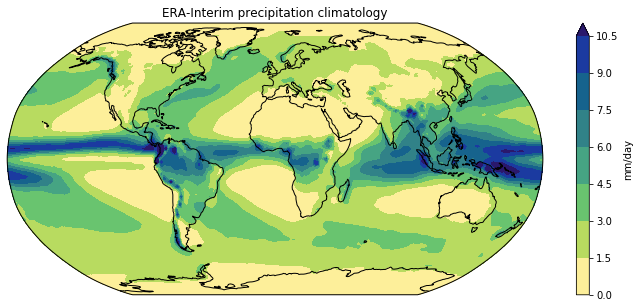

In [21]:
pr_file = '/Users/z3526123/Downloads/data/ERA_INT_pr.nc'

dset = xr.open_dataset(pr_file)
clim = dset['pr'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

clim = cyclic_da(clim)
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.Robinson())
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 12, 1.5),
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.haline_r)
ax.coastlines()

title = 'ERA-Interim precipitation climatology'
plt.title(title)

#plt.show()
plt.savefig('pr_clim.png', dpi=200, bbox_inches='tight')

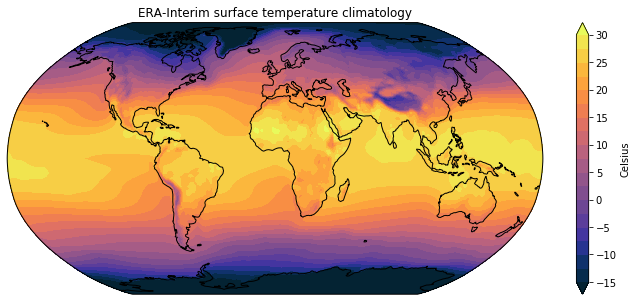

In [22]:
tas_file = '/Users/z3526123/Downloads/data/ERA_INT_tas.nc'

dset = xr.open_dataset(tas_file)
clim = dset['tas'].mean('time', keep_attrs=True)

clim.data = clim.data - 273.15
clim.attrs['units'] = 'Celsius'

clim = cyclic_da(clim)
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.Robinson())
clim.plot.contourf(ax=ax,
                   levels=np.arange(-15, 32.5, 2.5),
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.thermal)
ax.coastlines()

title = 'ERA-Interim surface temperature climatology'
plt.title(title)

#plt.show()
plt.savefig('tas_clim.png', dpi=200, bbox_inches='tight')